In this notebook, we perform 1D advection on a tracer, $\phi$. Advection is the transport of a substance or quantity by bulk motion of a fluid. For the end points, we use periodic boundary conditions. These boundary conditions are often used to approximate a very large system by considering a small region, called a unit cell, which can be replicated over the entire system, hence the term periodic. 

Firstly, we describe the equation we would like to solve:

$$ \frac{\partial \phi}{\partial t} + a \frac{\partial \phi}{\partial x} = 0. $$

This equation qualitatively means that the tracer $\phi$ moves or advects with a speed $a$ in the fluid.

Mathematically, periodic boundary conditions imply that the solution should be periodic in this large system, i.e., if we take a domain and apply periodic boundary conditions, this domain will be one of the many copies, stacked one after the other. When we deal with the central difference scheme, we end with two unknowns, at each of the extremes. If our unit cell comprises of N grid points, labelled as $x_1,x_2,x_3...,x_N$, then the 0th grid point should actually be equal to the Nth grid point, and the (N+1)th grid point should be equal to the 1st grid point. For an arbitrary function $f(x)$, this can be stated as:

$$ f(x = x_1) = f(x = x_N+1), $$

$$ f(x = x_N) = f(x = 0).$$

The general form of analytical solution for this equation is:

$$ \phi(x,t) = A sin(k(x - at)) + B. $$

We consider a __full__ sine wave (so that we can apply periodic boundary conditions), and we check a specific solution:

$$ \phi(x,t) = sin \Big(\frac{2 \pi x}{L_x} \Big), $$
where $L_x$ is the wavelength of the wave, and has unit amplitude.

We implement the 1D advection equation for both positive and negative advection speeds, along with 1st order forward and backward difference, and summarise our results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [2]:
import Euler.Periodic_1D as elr

# Test 1: 1D Advection with positive advection speed

### Test 1.1: Forward difference

In [3]:
#Length of domain
Lx = 100

# Number of points
nx = 40

#Width of each cell
dx = Lx/nx


g = 9.81
rho0 = 1025

# An array for storing each point of domain
x = np.linspace(0,Lx,nx+1,dtype = float)

#Dropping the last point (needed to implement periodic BC)
x = x[0:-1]

In [4]:
def partial_x_bd(f, dx):
    
    """This function computes the backward derivative of x
    
    -------------------------------------------------------------------------------------
    Arguments:
    f: Function which needs to be differentiated
    dx: Width of each cell
    -------------------------------------------------------------------------------------
    Returns:
    dfdx: Partial derivative of f
    """
    
    dfdx = np.zeros_like(f)
    for j in range(f.size):
        dfdx[j] = 1/(dx) * (f[j]-f[j-1])

    return dfdx

def partial_x_fd(f, dx):
    
    """This function computes the forward derivative of x
    
    -------------------------------------------------------------------------------------
    Arguments:
    f: Function which needs to be differentiated
    dx: Width of each cell
    -------------------------------------------------------------------------------------
    Returns:
    dfdx: Partial derivative of f
    """
    
    dfdx = np.zeros_like(f)
    for j in range(f.size - 1):
        dfdx[j] = 1/(dx) * (f[j+1] - f[j])
    dfdx[-1] = 1/(dx) * (f[0] - f[-1])

    return dfdx

def adv_x_Euler(a,f1,switch_adv_scheme):
    
    """This function performs 1D advection on a tracer/momentum variable with constant speed
    
    -------------------------------------------------------------------------------------
    Arguments:
    a: Advection speed
    f1: Variable which needs to be advected
    switch_adv_scheme: Forward(> 0), backward (< 0) or always stable (= 0) scheme
    
    -------------------------------------------------------------------------------------
    Returns:
    f3: Array with advected variable
    """
    if(switch_adv_scheme < 0):
        f3 = -a*partial_x_bd(f1, dx)
        return f3
    elif(switch_adv_scheme > 0):
        f3 = -a*partial_x_fd(f1, dx)
        return f3
    elif(switch_adv_scheme == 0):
        f3 = -(a + abs(a))*0.5*partial_x_bd(f1, dx) - (a - abs(a))*0.5*partial_x_fd(f1, dx)
        return f3

In [5]:
#Initialising variables

phi_old = np.sin(2*np.pi*x/(Lx))
phi_old_t0 = np.sin(2*np.pi*x/(Lx))
phi_new = np.zeros(nx)

a = 1 #Speed of advection

#Time variables
t = 0
t_start = 0
t_end = 80
dt = 1

#True solution
phi_true = np.sin(2*np.pi*x/(Lx))

# Needed to create animations
phi_data = np.zeros((nx,int(t_end/dt) + 1))
phi_true_data = np.zeros((nx,int(t_end/dt) + 1))

# Choosing the correct advection scheme
# switch_adv_scheme > 0 implies forward difference, < 0 implies backward difference
# and = 0 implies a mixture of the two (explained in detail in Test 1.3).
switch_adv_scheme = 1

#Advecting the variable for fixed number of time steps
for t in np.arange(t_start,t_end,dt):
    phi_new = phi_old + dt*adv_x_Euler(a,phi_old,switch_adv_scheme)
    phi_true = np.sin(2*np.pi*(x - a*t)/Lx)
    
    phi_data[:,int(t/dt)] = phi_old
    phi_true_data[:,int(t/dt)] = phi_true
    
    phi_old = phi_new

In [6]:
from matplotlib import animation

fig,ax = plt.subplots(figsize = (13,5))
#plt.legend()

def update_fig(i):
    
    plt.clf()
    plt.title('Time = ' + str(dt*i))
    p1 = plt.plot(x, phi_true_data[:,i], label = 'True solution at time ' + str(t) + ' s(Theoretical)')
    p1 = plt.plot(x, phi_data[:,i], label = 'Advected solution at time ' + str(t) + ' s(Theoretical)')
    plt.legend()
    return p1

num_frames = 80
anim = animation.FuncAnimation(fig, update_fig, frames = num_frames, blit = True)
anim.save('1D_FD_Advection.mp4',writer = 'ffmpeg',fps = 8)

plt.close(anim._fig)

In [7]:
from IPython.display import Video
Video("1D_FD_Advection.mp4")

Text(0.5, 1.0, '1D advection using forward difference and positive advection velocity')

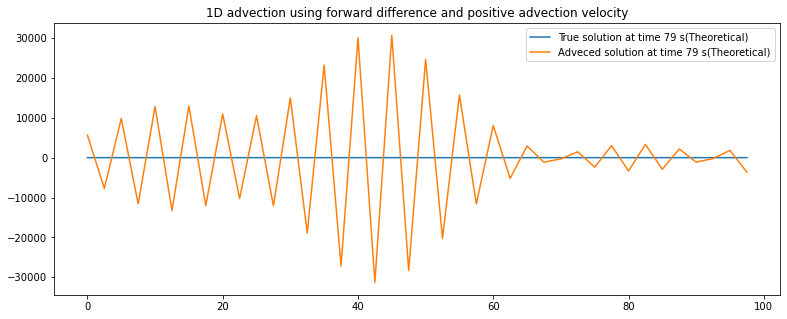

In [8]:
plt.figure(figsize = (13,5))
plt.plot(x, phi_true, label = 'True solution at time ' + str(t) + ' s(Theoretical)')
plt.plot(x, phi_old, label = 'Adveced solution at time ' + str(t) + ' s(Theoretical)')
plt.legend()
plt.title('1D advection using forward difference and positive advection velocity')

The animation above shows that close to $t = 60$ seconds, the simulation breaks. This happens because the Von-Neumann stability analysis shows that for positive advection speeds, forward differencing is unstable, and vice-versa. So, for positive advection velocity, we must use backward differencing to advect the tracer without the simulation blowing up. This is shown in the next sub-test.

### Test 1.2 : Backward difference

In [9]:
#Initialising variables

phi_old = np.sin(2*np.pi*x/(Lx))
phi_old_t0 = np.sin(2*np.pi*x/(Lx))
phi_new = np.zeros(nx)

a = 1 #Speed of advection

#Time variables
t = 0
t_start = 0
t_end = 80.01
dt = 1

#True solution
phi_true = np.sin(2*np.pi*x/(Lx))

# Needed to create animations
phi_data = np.zeros((nx,int(t_end/dt) + 1))
phi_true_data = np.zeros((nx,int(t_end/dt) + 1))

# Choosing the correct advection scheme
# switch_adv_scheme > 0 implies forward difference, < 0 implies backward difference
# and = 0 implies a mixture of the two (explained in detail in Test 1.3).
switch_adv_scheme = -1


#Advecting the variable for fixed number of time steps
for t in np.arange(t_start,t_end,dt):
    phi_new = phi_old + dt*adv_x_Euler(a,phi_old,switch_adv_scheme)
    phi_true = np.sin(2*np.pi*(x - a*t)/Lx)
    
    phi_data[:,int(t/dt)] = phi_old
    phi_true_data[:,int(t/dt)] = phi_true
    
    phi_old = phi_new

In [10]:
from matplotlib import animation

fig,ax = plt.subplots(figsize = (13,5))

def update_fig(i):
    
    plt.clf()
    plt.title('Time = ' + str(dt*i))
    p1 = plt.plot(x, phi_true_data[:,i], label = 'True solution at time ' + str(t) + ' s(Theoretical)')
    p1 = plt.plot(x, phi_data[:,i], label = 'Advected solution at time ' + str(t) + ' s(Theoretical)')
    plt.legend()
    return p1

num_frames = 80
anim = animation.FuncAnimation(fig, update_fig, frames = num_frames, blit = True)
anim.save('1D_BD_Advection.mp4',writer = 'ffmpeg',fps = 8)

plt.close(anim._fig)

In [11]:
from IPython.display import Video
Video("1D_BD_Advection.mp4")

Unsurprisingly, as the Von-Neumann anaylsys states, the forward differencing scheme is unstable for positive advectin speeds. However, one thing to note in the second case (backward difference + positive advection velocity) is that there is artifical dissipation. This is a common issue with the 1st order accurate differencing schemes. We can reduce it by having the Courant number as close to 1 as possible. For the above case, it is $a \frac{\Delta t}{\Delta x}$, and substituting for each variable, we get:

$$ a \frac{\Delta t}{\Delta x} = 1 \frac{2}{2.5} = 0.8 $$.

Let us take a scenario where the Courant number is 1, so for that, $\Delta t = 2.5$ seconds.  

In [12]:
#Initialising variables

phi_old = np.sin(2*np.pi*x/(Lx))
phi_old_t0 = np.sin(2*np.pi*x/(Lx))
phi_new = np.zeros(nx)

a = 1 #Speed of advection

#Time variables
t = 0
t_start = 0
t_end = 80.01
dt = 2.5

#True solution
phi_true = np.sin(2*np.pi*x/(Lx))

# Needed to create animations
phi_data = np.zeros((nx,int(t_end/dt) + 1))
phi_true_data = np.zeros((nx,int(t_end/dt) + 1))

# Choosing the correct advection scheme
# switch_adv_scheme > 0 implies forward difference, < 0 implies backward difference
# and = 0 implies a mixture of the two (explained in detail in Test 1.3).
switch_adv_scheme = -1


#Advecting the variable for fixed number of time steps
for t in np.arange(t_start,t_end,dt):
    phi_new = phi_old + dt*adv_x_Euler(a,phi_old,switch_adv_scheme)
    phi_true = np.sin(2*np.pi*(x - a*t)/Lx)
    
    phi_data[:,int(t/dt)] = phi_old
    phi_true_data[:,int(t/dt)] = phi_true
    
    phi_old = phi_new

In [13]:
from matplotlib import animation

fig,ax = plt.subplots(figsize = (13,5))

def update_fig(i):
    
    plt.clf()
    plt.title('Time = ' + str(dt*i))
    p1 = plt.plot(x, phi_true_data[:,i], label = 'True solution at time ' + str(t) + ' s(Theoretical)')
    p1 = plt.plot(x, phi_data[:,i], label = 'Advected solution at time ' + str(t) + ' s(Theoretical)')
    plt.legend()
    return p1

num_frames = 32
anim = animation.FuncAnimation(fig, update_fig, frames = num_frames, blit = True)
anim.save('1D_BD_Advection_2.mp4',writer = 'ffmpeg',fps = 8)

plt.close(anim._fig)

In [14]:
Video("1D_BD_Advection_2.mp4")

We see that the largest error in the present case is smaller ($\approx 0.15$) as compared to the previous case, where $a = 1$ (error $= 0.22$).

Not shown here are two other tests, where the advection speed is negative, and the forward differencing scheme is stable, and the backward differencing scheme is unstable. However, there are several issues here:

1. It is very impractical to explicitly choose a stable finite differencing scheme on the basis of the sign of advection velocity. 
2. As soon as we move out of this highly idealised world into something even a bit more complicated, like the 1D shallow water equations, we will observe that there will be some locations where the velocity will be negative, and others where it will be positive. Therefore, instead of hard-coding, it'll be better if the code itself checks for it. There are two ways of achieving this:
    
    (i) Using an if-else loop. This is a naive way of addressing this issue. No doubt, this will work, but we can get rid of the i-else loop using the idea presented in (ii).
    
    (ii) Using a methodology like:
    (a + |a|) $\times$ 0.5 $\times$ Backward difference + (a - |a|) $\times$ 0.5 $\times$ Forward difference. Suppose a is negative, then $(a + |a|) = 0$, and $(a + |a|) = a$. So, there will be no conribution from the backward differcing scheme, and vice-versa.
    
Both (i) and (ii) will be stable for all advection velocities. Below, we code for (ii).

### Test 1.3: The code chooses which advection scheme to perform

In [15]:
#Initialising variables

phi_old = np.sin(2*np.pi*x/(Lx))
phi_old_t0 = np.sin(2*np.pi*x/(Lx))
phi_new = np.zeros(nx)

a = 1 #Speed of advection

#Time variables
t = 0
t_start = 0
t_end = 80.01
dt = 2

#True solution
phi_true = np.sin(2*np.pi*x/(Lx))

# Needed to create animations
phi_data = np.zeros((nx,int(t_end/dt) + 1))
phi_true_data = np.zeros((nx,int(t_end/dt) + 1))

# Choosing the correct advection scheme
# switch_adv_scheme > 0 implies forward difference, < 0 implies backward difference
# and = 0 implies a mixture of the two (explained in detail in Test 1.3).
switch_adv_scheme = 0


#Advecting the variable for fixed number of time steps
for t in np.arange(t_start,t_end,dt):
    phi_new = phi_old + dt*adv_x_Euler(a,phi_old,switch_adv_scheme)
    phi_true = np.sin(2*np.pi*(x - a*t)/Lx)
    
    phi_data[:,int(t/dt)] = phi_old
    phi_true_data[:,int(t/dt)] = phi_true
    
    phi_old = phi_new

In [16]:
from matplotlib import animation

fig,ax = plt.subplots(figsize = (13,5))

def update_fig(i):
    
    plt.clf()
    plt.title('Time = ' + str(dt*i))
    p1 = plt.plot(x, phi_true_data[:,i], label = 'True solution at time ' + str(t) + ' s(Theoretical)')
    p1 = plt.plot(x, phi_data[:,i], label = 'Advected solution at time ' + str(t) + ' s(Theoretical)')
    plt.legend()
    return p1

num_frames = 41
anim = animation.FuncAnimation(fig, update_fig, frames = num_frames, blit = True)
anim.save('1D_stable_Advection.mp4',writer = 'ffmpeg',fps = 8)

plt.close(anim._fig)

In [17]:
Video("1D_stable_Advection.mp4")

# Test 2: Error analysis

We move on to the next step - error analysis. A good way to check whether our code is computing the correct data is  to change the number of points in the domain, and comparing the error with the original case. We have applied a first order differencing scheme, so we should expect our errors to drop down as $dx (= \frac{1}{nx})$, where $nx$ is the number of points in the domain, and $dx$ is the spacing between two points. 

In [18]:
Lx = 100
g = 9.81
rho0 = 1025

a = 1
nx = [8,32,64,128,256,512,1024,2048,4096]
error_phi = np.zeros(len(nx))

switch_adv_scheme = 0
for i,nxi in enumerate(nx):
    dx = Lx/nxi
    
    x = np.linspace(0,Lx,nxi+1,dtype = float)
    x = x[0:-1]

    phi_old = np.sin(2*np.pi*x/(Lx))
    phi_new = np.zeros(nxi)

    a = -0.5 #Speed of advection

    t_start = 0
    t_end = 20
    dt = 0.01
    for t in np.arange(t_start,t_end,dt):
        phi_new = phi_old + dt*adv_x_Euler(a,phi_old,switch_adv_scheme)
        phi_old = phi_new
        
    phi_actual = (np.sin(2*np.pi*(x - a*t)/(Lx)))
    error_phi[i] = max(abs(phi_new - phi_actual))

In [19]:
nx_inv = np.zeros(len(nx))
nx2_inv = np.zeros(len(nx))
for i,nxi in enumerate(nx):
    nx_inv[i] = 1/nxi
    nx2_inv[i] = 1/nxi**2

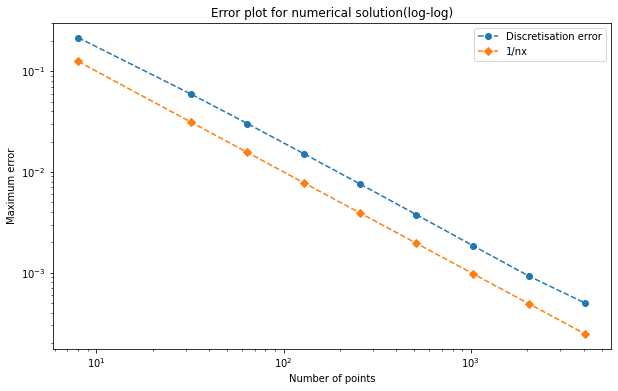

In [20]:
plt.figure(figsize = (10,6))
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Number of points")
plt.ylabel("Maximum error")
plt.plot(nx,error_phi,marker='o',linestyle = '--',label = 'Discretisation error')
plt.plot(nx,nx_inv,marker = 'D',linestyle = '--', label = '1/nx')
plt.title("Error plot for numerical solution(log-log)")
plt.legend()
plt.show()

This error plot shows something we expected - the error indeed drops down as we increase the number of points in the domain. This ends our analysis of the 1D advection of a tracer. However, this code is generalised, and is valid for a different curve (other than the sine curve) as well, provided that the curve satisfies the criteria for applying periodic boundary conditions.